In [2]:
#INITIALISATIE
import random as random
import numpy as np
import matplotlib.pyplot as plt
from math import *
import seaborn as sns

In [12]:
#EXPRESSIONS IN TERMS OF DELTA'S

#Beetje omslachtig, maar als p=N bereken je Pclv(1). Om Pclv(y) te berekenen doe je
    #LambdaRe(p=N)/LambdaRe(p=y) (Dit is geen typefout ;))
def LambdaRe(Dpam, N, p, MM, Da, Di, Dc):
    cx = 0
    res = 1
    for x in range(1,p):
        cx = cx + ((x) in MM)
        res = res + exp(-(Dpam + (x-1)*Da - Di*cx - Dc*(x==(N-1))))
    LambdaR = 1./res
    return LambdaR

#T(1)
def psiRe(Dpam, N, MM, Da, Di, Dc, k0, DGmin):
    res = 0
    for x in range(1,N):
        clx = 0
        for l in range(1,x+1):
            clx = 0
            for j in range(l,x+1):  
                clx = clx + (j in MM)
            res = res + exp((-Dpam+Da)*(l==1) - Da*(x-l+1) + Di*clx + Dc*(x==(N-1)))
            
    Lambda1 = LambdaRe(Dpam,N,N,MM,Da,Di,Dc)
    psiR = (1./k0)*exp(DGmin)*res
    psiR = psiR*Lambda1 
    return psiR


#Tclv(1)
def tauRe(Dpam, N, MM, Da, Di, Dc, k0, DGmin):
    res = 0
    for x in range(0,N):
        clx = 0
        for l in range(1,x+1):
            clx = 0
            for j in range(l,x+1):  
                clx = clx+ (j in MM)
            Lambdal = LambdaRe(Dpam,N,N,MM,Da,Di,Dc)/LambdaRe(Dpam,N,l,MM,Da,Di,Dc)
            res = res + Lambdal*exp(-((l==1)*(Dpam-Da)+(x-l+1)*Da-clx*Di-(x==N-1)*Dc))   
            
    tauR = (1./k0)*exp(DGmin)*res
    return tauR


#Tub(1)
def tauubRe(Dpam,N,MM,Da,Di,Dc,k0,DGmin):
    res = 0
    for x in range(0,N):
        c = 0
        for l in range(1,x+1):
            c = 0
            for j in range(l,x+1):  
                c = c+ (j in MM)
            lambdal = 1-LambdaRe(Dpam,N,N,MM,Da,Di,Dc)/LambdaRe(Dpam,N,l,MM,Da,Di,Dc)
            res = res + lambdal*exp(-((l==1)*(Dpam-Da)+(x-l+1)*Da-c*Di-(x==N-1)*Dc))   
    
    lambdaclv = LambdaRe(Dpam,N,N,MM,Da,Di,Dc)
    tauR = (1./k0)*exp(DGmin)*res*lambdaclv/(1-lambdaclv)
    return tauR

In [13]:
#Constantes
N = 21         #Position of second absorber/cleavage

Dpam = 3.5       #Delta PAM
Da = .5         #Delta A
Di = 2         #Delta I
Dc = 1         #Delta clv

k0 = 1         #Constante in p,q
DGmin = 0     #Delta G^-

In [14]:
# Double mismatch x,y

Lambda = np.zeros((N-2,N-2))
psi = np.zeros((N-2,N-2))
tau = np.zeros((N-2,N-2))
tauub = np.zeros((N-2,N-2))
for x in range(2,N):
    print x
    for y in range(2,N):
        MM = [x,y]
        Lambda[x-2,y-2] = LambdaRe(Dpam, N, N, MM, Da, Di, Dc)
        psi[x-2,y-2] = psiRe(Dpam, N, MM, Da, Di, Dc, k0, DGmin)
        tau[x-2,y-2] = tauRe(Dpam, N, MM, Da, Di, Dc, k0, DGmin)
        tauub[x-2,y-2] = tauubRe(Dpam,N,MM,Da,Di,Dc,k0,DGmin)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


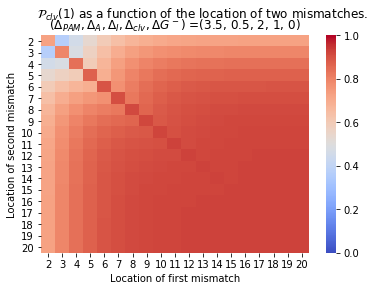

In [17]:
#HEATMAP PCLV(1)

title = '$\mathcal{P}_{clv}(1)$ as a function of the location of two mismatches.'
xtext = 'Location of first mismatch'
ytext = 'Location of second mismatch'
sns.heatmap(Lambda, cmap="coolwarm", vmin=0, vmax=1, xticklabels=range(2,N), yticklabels=range(2,N))   #, mask=Mark
plt.suptitle(title)
plt.title('($\Delta_{PAM}, \Delta_A, \Delta_I, \Delta_{clv}, \Delta G^-$) =' + str((Dpam, Da, Di, Dc, DGmin)))
plt.xlabel(xtext)
plt.ylabel(ytext)
plt.savefig('..\..\Afbeeldingen\DoubleMM\DMMxyPclv_a.png', bbox_inches = 'tight', dpi = 300)
plt.show()

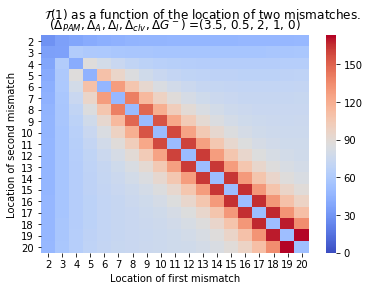

In [18]:
#HEATMAP T(1)

title = '$\mathcal{T}(1)$ as a function of the location of two mismatches.'
xtext = 'Location of first mismatch'
ytext = 'Location of second mismatch'
sns.heatmap(psi, cmap="coolwarm", vmin=0, xticklabels=range(2,N), yticklabels=range(2,N))
plt.suptitle(title)
plt.title('($\Delta_{PAM}, \Delta_A, \Delta_I, \Delta_{clv}, \Delta G^-$) =' + str((Dpam, Da, Di, Dc, DGmin)))
plt.xlabel(xtext)
plt.ylabel(ytext)
plt.savefig('..\..\Afbeeldingen\DoubleMM\DMMxyT_a.png', bbox_inches = 'tight', dpi = 300)
plt.show()

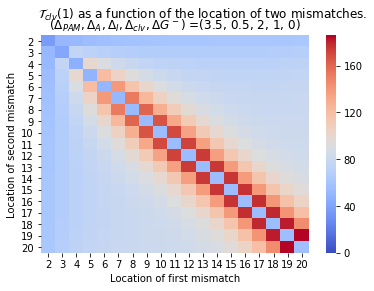

In [19]:
#HEATMAP TCLV(1)

from matplotlib.colors import LogNorm

title = '$\mathcal{T}_{clv}(1)$ as a function of the location of two mismatches.'
xtext = 'Location of first mismatch'
ytext = 'Location of second mismatch'
sns.heatmap(tau, cmap="coolwarm", xticklabels=range(2,N), yticklabels=range(2,N), vmin=0)
plt.suptitle(title)
plt.title('($\Delta_{PAM}, \Delta_A, \Delta_I, \Delta_{clv}, \Delta G^-$) =' + str((Dpam, Da, Di, Dc, DGmin)))
plt.xlabel(xtext)
plt.ylabel(ytext)
plt.savefig('..\..\Afbeeldingen\DoubleMM\DMMxyTclv_a.png', bbox_inches = 'tight', dpi = 300)
plt.show()

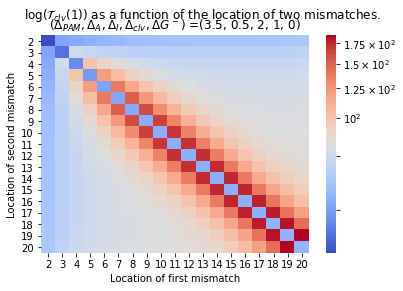

In [20]:
#HEATMAP TCLV(1) LOGARITMISCHE SCHAAL

from matplotlib.colors import LogNorm

title = 'log($\mathcal{T}_{clv}(1)$) as a function of the location of two mismatches.'
xtext = 'Location of first mismatch'
ytext = 'Location of second mismatch'
sns.heatmap(tau, cmap="coolwarm", xticklabels=range(2,N), yticklabels=range(2,N), norm=LogNorm())
plt.suptitle(title)
plt.title('($\Delta_{PAM}, \Delta_A, \Delta_I, \Delta_{clv}, \Delta G^-$) =' + str((Dpam, Da, Di, Dc, DGmin)))
plt.xlabel(xtext)
plt.ylabel(ytext)
plt.savefig('..\..\Afbeeldingen\DoubleMM\DMMxyTclv_alog.png', bbox_inches = 'tight', dpi = 300)
plt.show()

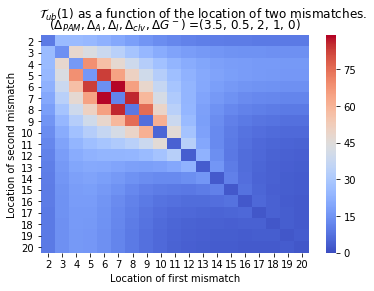

In [21]:
#HEATMAP TUB(1)

from matplotlib.colors import LogNorm

title = '$\mathcal{T}_{ub}(1)$ as a function of the location of two mismatches.'
xtext = 'Location of first mismatch'
ytext = 'Location of second mismatch'
sns.heatmap(tauub, cmap="coolwarm", xticklabels=range(2,N), yticklabels=range(2,N), vmin=0)
plt.suptitle(title)
plt.title('($\Delta_{PAM}, \Delta_A, \Delta_I, \Delta_{clv}, \Delta G^-$) =' + str((Dpam, Da, Di, Dc, DGmin)))
plt.xlabel(xtext)
plt.ylabel(ytext)
plt.savefig('..\..\Afbeeldingen\DoubleMM\DMMxyTub_a.png', bbox_inches = 'tight', dpi = 300)
plt.show()

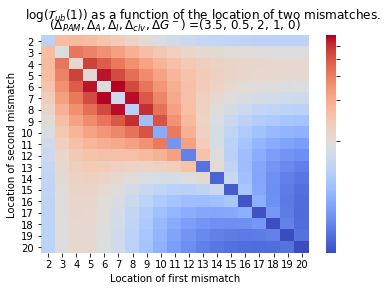

In [22]:
#HEATMAP TUB(1) LOGARITMISCHE SCHAAL

from matplotlib.colors import LogNorm

title = 'log($\mathcal{T}_{ub}(1)$) as a function of the location of two mismatches.'
xtext = 'Location of first mismatch'
ytext = 'Location of second mismatch'
sns.heatmap(tauub, cmap="coolwarm", xticklabels=range(2,N), yticklabels=range(2,N), norm=LogNorm(vmin=1, vmax=150))
plt.suptitle(title)
plt.title('($\Delta_{PAM}, \Delta_A, \Delta_I, \Delta_{clv}, \Delta G^-$) =' + str((Dpam, Da, Di, Dc, DGmin)))
plt.xlabel(xtext)
plt.ylabel(ytext)
plt.savefig('..\..\Afbeeldingen\DoubleMM\DMMxyTub_alog.png', bbox_inches = 'tight', dpi = 300)
plt.show()